<a href="https://www.kaggle.com/code/raofaizan/gender-classification?scriptVersionId=126435351" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# GENDER CLASSIFICATION

In [71]:
# Import required libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [72]:
BASIC_PATH = "/kaggle/input/celeba-dataset"
IMG_PATH = os.path.join(BASIC_PATH,'img_align_celeba/img_align_celeba')
FEATURE_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')

In [73]:
n_images = len(os.listdir(IMG_PATH))
print("Total Images in the Dataset: ", n_images)

Total Images in the Dataset:  202599


In [91]:
# Read the attributes csv files in a dataframe format.
df = pd.read_csv(FEATURE_PATH, usecols=['image_id','Male'], nrows= 2500)

# Reset the columns values to categorical.
df.loc[df['Male'] == -1,'Male'] = "Female"
df.loc[df['Male'] == 1,'Male'] = "Male"

# Change column names.
df.columns = ["image_id", "Gender"]

df.head(10)

,image_id,Gender
0,000001.jpg,Female
1,000002.jpg,Female
2,000003.jpg,Male
3,000004.jpg,Female
4,000005.jpg,Female
5,000006.jpg,Female
6,000007.jpg,Male
7,000008.jpg,Male
8,000009.jpg,Female
9,000010.jpg,Female


## Sample Images

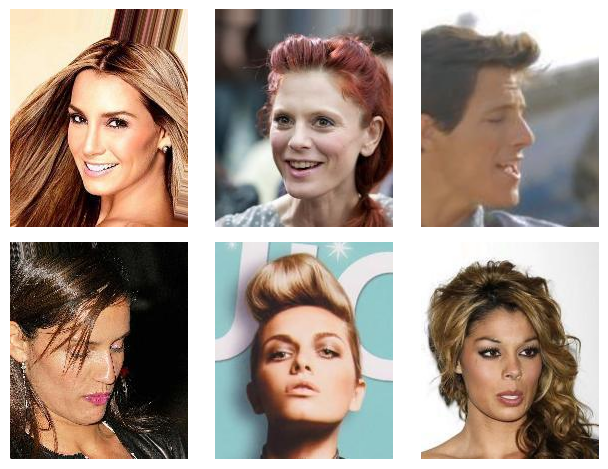

In [92]:
# Display Multiple Sample Images.
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    
    # Read an Image.
    img = cv2.imread(IMG_PATH + '/' + df["image_id"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display Image.
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [93]:
# Get the category distribution.
category_count = df["Gender"].value_counts()
category_count

Female    1455
Male      1045
Name: Gender, dtype: int64

In [94]:
# Get the indices of the female images.
female_indices = df[df["Gender"] == "Female"].index

# Drop the extra rows of female images to fix class imbalance problem.
df = df.drop(female_indices[:category_count[0] - category_count[1]])

<AxesSubplot:>

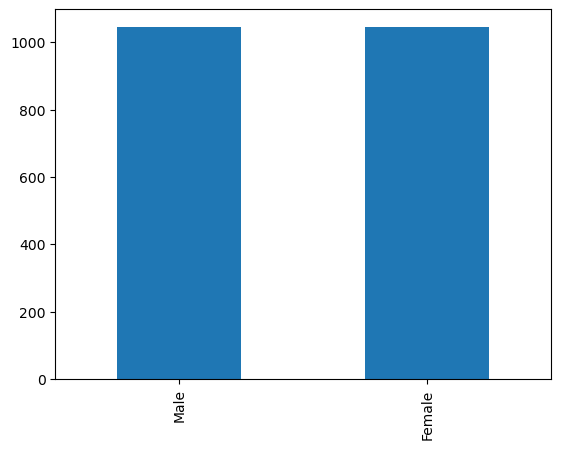

In [95]:
df["Gender"].value_counts().plot.bar()

## Train, Test, and Validation Split

In [96]:
train_df, test_df = train_test_split(df, test_size=0.3)
test_df, validation_df = train_test_split(test_df, test_size=0.33)

In [97]:
print("Total Train Sample Images : ", len(train_df))
print("Total Test Sample Images : ", len(test_df))
print("Total Validation Sample Images : ", len(validation_df))

Total Train Sample Images :  1463
Total Test Sample Images :  420
Total Validation Sample Images :  207


## Create Image Data Generators for train and validation data

In [98]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 15

In [100]:
# Generate Train Images Data Generator.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    IMG_PATH + "/", 
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 1463 validated image filenames belonging to 2 classes.


In [101]:
# Generate Validation Images Data Generator.
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    IMG_PATH + "/", 
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 207 validated image filenames belonging to 2 classes.
